In [1]:
# Understanding the choise of learning rate as a hyperparamter, its importance and best practices in Deep Learning

# **Learning Rate in Deep Learning**
Learning Rate (LR) is an important hyperparameter to tune for effective training of deep neural networks (DNNs). One of the most important
performance optimization for DNNs is to train a deep learning
model capable of achieving **high test accuracy**.

Training a deep neural network (DNN) is an iterative **global optimization** problem. During each iteration, a loss function
is employed to measure the deviation of its prediction to the
ground truth and update the model parameters θ, aiming to
**minimize** this loss function L(θ).

Gradient Descent (GD) is a popular class of non-linear optimization algorithms that iteratively learn to minimize such a loss function.

In the gradient descent methods, the loss gradient is computed using the current model with the training set, and then **each model parameter** is updated by the loss gradient multiplied by the learning rate as shown below:

      Θ(t) = Θ(t-1) - 𝝶x∇L(Θ)

    where L(Θ) is the loss function, ∇L(Θ) represents the gradients,
    t is the current iteration, and 𝝶 is the learning rate with range of (0, 1).
    Θ(t) is parameters that needs to be updated at current iterations.


Even if the range for choosing learning rate is just between 0 and 1, It affects the model learning and performance to very large extent.

# Why choosing a learning rate value for training model is so important ?

Choosing a proper learning rate can be difficult. A **too small**
learning rate may lead to **slow convergence**, while a **too large**
learning rate can deter convergence and cause the loss function
to fluctuate and get stuck in a **local minimum** or even to
**diverge**.

In order to escape the local minima and saddle points and
converge to the global optima, the learning rate needs to be choosen properly based on **dataset** and deep learning models used.

Most common choice of learning rate is **constant value** like 0.01 or other..


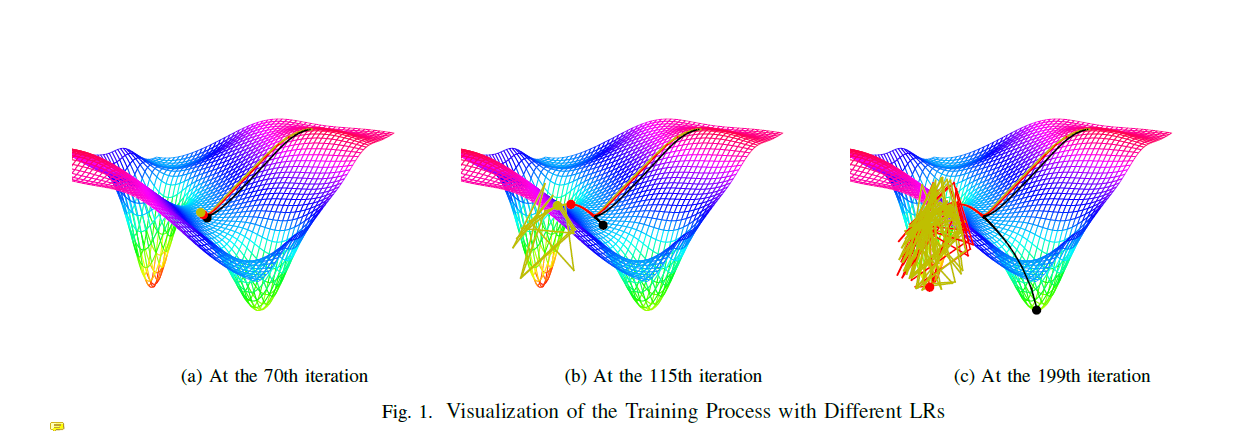

-----------> image from original papementioned in reference.

In [2]:
import torch
import tensorflow as tf

In [3]:
# defining learning and using it in Optimizer used in the training process
learning_rate = 0.001

# using learning rate in tensorflow code
tf_optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)


# using learning rate in pytorch code
model = torch.nn.Linear(20, 10)  # model to be trained
torch_optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Family of Gradient descent Optimizers
There are various types of Gradient Descent optimizers used in traning deep learning models as shown below:
1. Stochastic Gradient Descent
2. Adam
3. RMSProp
4. AdaDelta
5. AdamW
6. Lion
7. Adagrad

And many more.


Most of above methods other than SGD are **adaptive** gradient descent methods. These algorithms are more focused on the efficiency in **convergence** than
the **generalization** of models for accuracy.

Since, all above optimizer uses learning rate as one of their parameter. Let's understand how we can provide this hyperparameter while training the models to achieve **best results**.






In [ ]:
# Learning rate tuning

# Ways of tuning Learning rate through different LR policies

Ideally, We want to have a suitable **LR Policy** that will gradually improve the model, coverge faster and lead to a high accuracy at the end of the training.

*************************************

1. **Fixed Learning Rate**

When learning rate is a constant value from the domain of (0, 1). Although using a relatively small fixed LR value is a conservative approach of avoiding bad LR policies, it has the high cost of slow convergence and long training time, combined with little guarantee of high accuracy.

Many times, Results of Fixed LR policy is used as **baseline** for comparing other LR Policies. Most common LR used are (0.1, 0.01, 0.001, 0.005, 0.0001). More deeper the model are, smaller the learning rate used.

**Note**: Learning rate should not be less than 0.00001 as it may lead to no learning because of very very slow convergence.



***********************************


2. **Adaptive Learning Rate**

In the gradient-based optimization, it is desirable to determine the **step-size** automatically based on the loss gradient that reflects the convergence of each of the unknown parameters.

To this aim, the **parameter-wise** adaptive learning rate scheduling has been
developed, such as AdaGrad, AdaDelta, RMSprop, and Adam, that
provide a **quick convergence** of the algorithm in practice.

**Note**: In most of the deep learning model, It works well and provide best training results. But these methods lacks to provide best test accuracy after a certain limit because of lack of better generalisation.

In [4]:
# Types of Adaptive Learning and its advantages/disadvantages
"""
The heuristic annealing procedure discussed above modifies
a single global learning rate that applies to all dimensions of
the parameters.

1. Momentum   - first order methods

 One method of speeding up training per-dimension is the momentum method.
 This is perhaps the simplest extension to SGD that has been successfully used
 for decades. The main idea behind momentum is to accelerate progress along
 dimensions in which gradient consistently point in the same direction and to slow
 progress along dimensions where the sign of the gradient continues to change.

 This is done by keeping track of past parameter updates with an exponential decay:
       ∆x(t) = ρ∆x(t−1) − ηg(t)
       ρ is a constant controlling the decay of the previous parameter updates


The gradients along the valley, despite
being much smaller than the gradients across the valley, are
typically in the same direction and thus the momentum term
accumulates to speed up progress.

In SGD the progress along
the valley would be slow since the gradient magnitude is small
and the fixed global learning rate shared by all dimensions
cannot speed up progress.  Choosing a higher learning rate
for SGD may help but the dimension across the valley would
then also make larger parameter updates which could lead
to oscillations back as forth across the valley.

These oscillations are mitigated when using momentum because the sign
of the gradient changes and thus the momentum term damps
down these updates to slow progress across the valley. Again,
this occurs per-dimension and therefore the progress along the
valley is unaffected.
"""

# Adagrad -- first order method

"""
    ∆x(t) = - n*g(t) / sqrt(sum of l2 norms of previous gradients)

Here the denominator computes the l2 norm of all previous
gradients on a per-dimension basis and η is a global learning
rate shared by all dimensions.

While there is the hand tuned global learning rate, each
dimension has its own dynamic rate. Since this dynamic rate
grows with the inverse of the gradient magnitudes, large gradients
have smaller learning rates and small gradients have
large learning rates.

Drawback:
Also, due to the continual
accumulation of squared gradients in the denominator, the
learning rate will continue to decrease throughout training,
eventually decreasing to zero and stopping training completely.
"""

# Second Order Info


3. **Learning-Rate Decay**

Decaying Learning Rates use different forms of decay functions to improve the convergence speed of deep Learning model training by **LR annealing**.

In general, learning rate scheduling specifies a certain learning rate for each **epoch** and **batch**. The most preferred method is the learning rate annealing that is scheduled to **gradually decay** the learning rate during the training process. A relatively **large step-size** is preferred at the initial stages of training in order to obtain a better **generalization effect**.

The **shrinkage** of the learning rate reduces the **stochastic noise**. This avoids the oscillation near the optimal point and helps the algorithm to converge.

The popular decay methods of the learning rate are:

1. **The step (staircase) decay**

It defines the LR annealing schedule by a fixed step size, such as an update
every l iterations (l > 1).
It starts with a relatively large LR value, defined by k0, and decays the LR value over time.

Here, the step (l) need **not be fixed**. It can be varying step sizes too like [100, 200, 500, 1000, 5000 ...]. **Varying Steps** proved to be more efficient than fixed step learning rate decay.


2. **The exponential decay**

It attenuates the learning rate sequentially for each step and provides a smooth curve using an exponential function. Similarily, There are other functions like the inverse time function and the polynomial function.

For more info, refer to **[2]** of reference.


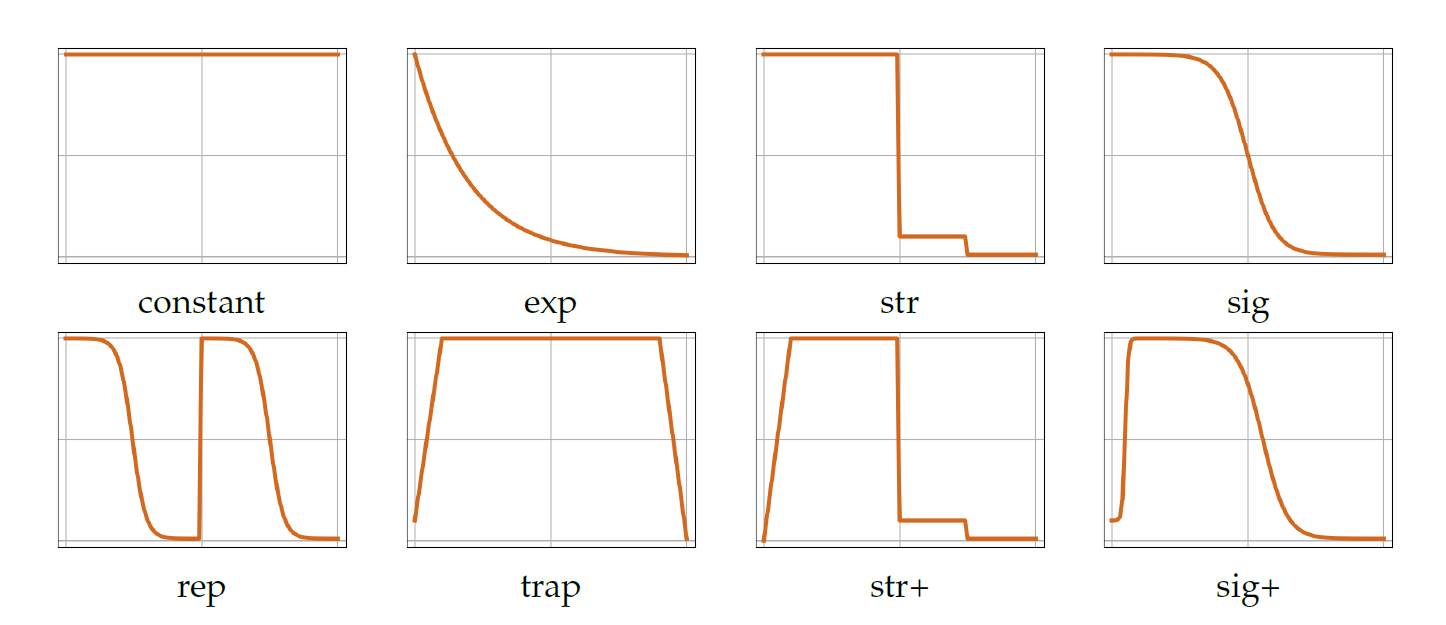


------------------> image from original paper mentioned in the reference


In [ ]:
#

4. **Cyclic Learning Rates (CLRs)**

It vary the LR value within a **pre-defined** value **range cyclically** during each predefined LR step, instead of setting it to a fixed value or using some form of decay schedule. The types of CLR methods are : triangle-based, sin-based and cosine-based.

The observation behind the
cyclic method is that increasing the learning rate in the optimization process may have
a negative effect, but can result in a better generalization of the trained model. Sometimes, it may be possible that It does not coverge at all or coverge at local minimum.

In [ ]:
#

5.  **Learning-Rate Warmup**

The learning rate warmup is a recent approach that uses a relatively
small step size at the beginning of the training. The learning rate is **increased**
linearly or non-linearly to a specific value in the first few epochs, and then shrinks to zero.

The observations behind the warmup are that:
* the model parameters are initialized using a **random distribution**, and thus, the initial model is far from the ideal one; thus, an overly large learning rate causes numerical instability.
* training a initial model carefully in the first few epochs may enable us to apply a larger learning rate in the **middle stage** of the training, resulting in a better **regularization**.


For example: Sigmoid decay with warmup


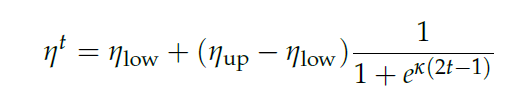


where n(t) is the learning rate at step t (scaled in [0, 1] for numerical convenience), and n(up), and n(low), respectively define the upper and lower bounds of desired learning rates.

K is a coefficient that can adjust the slope of the learning rate curve, and we use k = 1/5.

This method is designed to leverage both a smooth learning rate
curve with a warmup strategy.


Using base LR rate of SGD, we can set the upper and lower bounds of learning rate curves as n(up) = 0.1 and n(low) = 0.001.



In [ ]:
# Observations
"""
1. The employment of a large learning rate in the first and middle
   stages of training process (e.g., step and sigmoid) results in better accuracy
   than the exponential one (exp).

2. The annealing using sigmoid and warmup together provides the best performance
   in most cases with the deep networks.

3. Varying Step decay is a multi-step decaying LR function with variable step sizes,
   aiming to update the LR value when the test accuracy or loss fails to improve.

4. Most LR functions involve two important sets of parameters:
   (1) the initial LR value or the minimum and maximum LR boundary values, and
   (2) the LR value update schedule.

# Use of LRBench

LRBench is an **LR benchmarking** system that provides **automated**
or semi-automated tuning and optimization for finding
and selecting a **good LR policy** when DNN developers or endusers
have chosen the dataset and the DNN model for training.

The LRBench code (implemented in Python on top of Caffe) have been **open sourced** on GitHub, which can be plugged into or extended for other open
source deep learning frameworks, e.g., TensorFlow, Caffe,
PyTorch, Keras.

**Uses:**

Given a new learning task on a new dataset and a neural
network model used for model training, LRBench will first
search its **LR policy database**, if the related records are found,
such as the training results on the same or a similar dataset
or neural network, LRBench will use the stored LR ranges as
a starting point. Otherwise, LRBench will perform an initial
LR range test based on **popular heuristics**, such as scaling by
10, to determine the good LR ranges, and to reduce the search
space significantly. Then based on different training goals, i.e.,
**high accuracy** or low cost, LRBench will tune the settings of
a chosen LR function in finer granularity.


LRBench can significantly reduce the **search range** of optimal learning rate by more than **99%** in most of the cases. This can help in saving lot of time and training resouces and its associated **cost**.

# References:

1. Learning-Rate Annealing Methods for Deep Neural Networks. read [here](https://www.mdpi.com/2079-9292/10/16/2029).

2. Demystifying Learning Rate Policies.... read [here](https://arxiv.org/abs/1908.06477).

3. Efficient learning rate adaptation... read [here](https://www.sciencedirect.com/science/article/pii/S0893608022000478).

4. AdaDelta, An Adaptive Learning rate method. read [here](https://arxiv.org/pdf/1212.5701.pdf).